In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
import statistics
import warnings
import seaborn as sns
import random as rd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
all_merged_df = pd.read_csv("/home/all_data/all_merged.csv")
all_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       905 non-null    int64  
 1   Unnamed: 0_x       905 non-null    int64  
 2   game_id            905 non-null    object 
 3   cta_start_x        689 non-null    float64
 4   cta_start_y        689 non-null    float64
 5   cta_end_x          689 non-null    float64
 6   cta_end_y          689 non-null    float64
 7   cta_height         689 non-null    float64
 8   cta_width          689 non-null    float64
 9   Unnamed: 0_y       905 non-null    int64  
 10  color_1            900 non-null    object 
 11  color_1_occurance  900 non-null    float64
 12  color_2            898 non-null    object 
 13  color_2_occurance  898 non-null    float64
 14  color_3            898 non-null    object 
 15  color_3_occurance  898 non-null    float64
 16  color_4            897 non

In [5]:
cols = all_merged_df.columns.tolist()
cols

['Unnamed: 0.1',
 'Unnamed: 0_x',
 'game_id',
 'cta_start_x',
 'cta_start_y',
 'cta_end_x',
 'cta_end_y',
 'cta_height',
 'cta_width',
 'Unnamed: 0_y',
 'color_1',
 'color_1_occurance',
 'color_2',
 'color_2_occurance',
 'color_3',
 'color_3_occurance',
 'color_4',
 'color_4_occurance',
 'color_5',
 'color_5_occurance',
 'Unnamed: 0',
 'logo_start_x',
 'logo_start_y',
 'logo_end_x',
 'logo_end_y',
 'logo_height',
 'logo_width']

In [7]:
cols_drop = ['Unnamed: 0', 'Unnamed: 0_y', 'Unnamed: 0.1','Unnamed: 0_x'] 
all_merged_df.drop(cols_drop, inplace=True, axis=1)

In [8]:
all_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_id            905 non-null    object 
 1   cta_start_x        689 non-null    float64
 2   cta_start_y        689 non-null    float64
 3   cta_end_x          689 non-null    float64
 4   cta_end_y          689 non-null    float64
 5   cta_height         689 non-null    float64
 6   cta_width          689 non-null    float64
 7   color_1            900 non-null    object 
 8   color_1_occurance  900 non-null    float64
 9   color_2            898 non-null    object 
 10  color_2_occurance  898 non-null    float64
 11  color_3            898 non-null    object 
 12  color_3_occurance  898 non-null    float64
 13  color_4            897 non-null    object 
 14  color_4_occurance  897 non-null    float64
 15  color_5            894 non-null    object 
 16  color_5_occurance  894 non

#### Handle missing values for CTA position

* Using forward and backward filling

In [23]:
df_cta = all_merged_df[['cta_start_x', 'cta_start_y', 'cta_end_x','cta_end_y','cta_height','cta_width']].ffill().bfill()
df_cta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cta_start_x  905 non-null    float64
 1   cta_start_y  905 non-null    float64
 2   cta_end_x    905 non-null    float64
 3   cta_end_y    905 non-null    float64
 4   cta_height   905 non-null    float64
 5   cta_width    905 non-null    float64
dtypes: float64(6)
memory usage: 42.5 KB


In [25]:
df_cta.isna().sum()

cta_start_x    0
cta_start_y    0
cta_end_x      0
cta_end_y      0
cta_height     0
cta_width      0
dtype: int64

In [28]:
all_merged_df['cta_start_x'] = df_cta['cta_start_x']
all_merged_df['cta_start_y'] = df_cta['cta_start_y']
all_merged_df['cta_end_x'] = df_cta['cta_end_x']
all_merged_df['cta_end_y'] = df_cta['cta_end_y']
all_merged_df['cta_height'] = df_cta['cta_height']
all_merged_df['cta_width'] = df_cta['cta_width']

In [29]:
all_merged_df[['cta_start_x', 'cta_start_y', 'cta_end_x','cta_end_y','cta_height','cta_width']].isna().sum()

cta_start_x    0
cta_start_y    0
cta_end_x      0
cta_end_y      0
cta_height     0
cta_width      0
dtype: int64

#### Visulaize location and area of CTA button

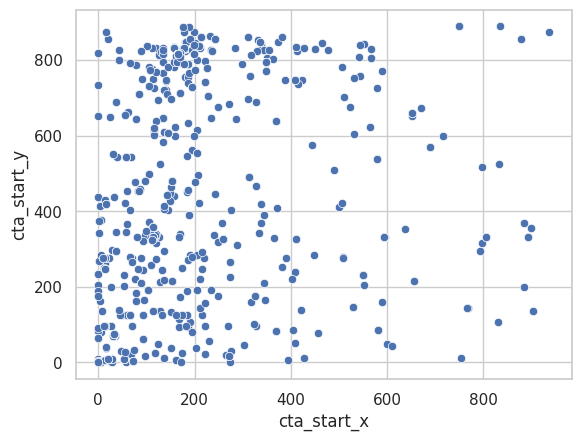

In [31]:
sns.set(style='whitegrid')
sns.scatterplot(x="cta_start_x",
                    y="cta_start_y",
                    data=df_cta);

In [58]:
def calc_area(df):
    area = []
    for i,row in df.iterrows():
        area.append(row['cta_width']*row['cta_height'])
    return area

In [37]:
df_cta['area'] = calc_area(df_cta)
df_cta['area'].describe()

count       905.000000
mean      40292.538122
std       94729.961811
min        1064.000000
25%       11700.000000
50%       17388.000000
75%       22500.000000
max      540000.000000
Name: area, dtype: float64

#### Distribution of CTA Area

<AxesSubplot: >

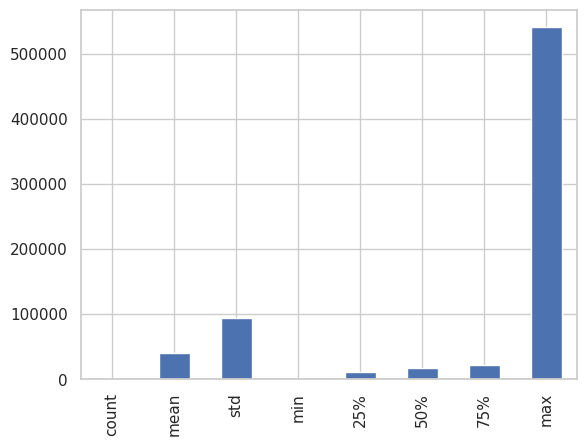

In [38]:
df_cta['area'].describe().plot(kind='bar')

In [39]:
df_cta['area'].value_counts().head(10)

19200.0     130
11700.0     124
46436.0      43
6052.0       36
540000.0     22
300000.0     18
19040.0      11
13200.0      10
20274.0       8
10659.0       8
Name: area, dtype: int64

In [41]:
df_cta_area_sorted = df_cta.sort_values(by=['area'],ascending=False)
df_cta_area_sorted['area']

0      540000.0
622    540000.0
81     540000.0
732    540000.0
155    540000.0
         ...   
240      4046.0
239      4046.0
481      3979.0
280      1376.0
270      1064.0
Name: area, Length: 905, dtype: float64

In [45]:
all_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_id            905 non-null    object 
 1   cta_start_x        905 non-null    float64
 2   cta_start_y        905 non-null    float64
 3   cta_end_x          905 non-null    float64
 4   cta_end_y          905 non-null    float64
 5   cta_height         905 non-null    float64
 6   cta_width          905 non-null    float64
 7   color_1            900 non-null    object 
 8   color_1_occurance  900 non-null    float64
 9   color_2            898 non-null    object 
 10  color_2_occurance  898 non-null    float64
 11  color_3            898 non-null    object 
 12  color_3_occurance  898 non-null    float64
 13  color_4            897 non-null    object 
 14  color_4_occurance  897 non-null    float64
 15  color_5            894 non-null    object 
 16  color_5_occurance  894 non

In [46]:
all_merged_df.to_csv("/home/all_data/all_merged_cta_cleaned.csv")